# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

#### **Import Dataset and create a copy of that dataset**

In [2]:
data = pd.read_csv("data1.csv")
df = data.copy()

#### **Take a look at data set** 

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### Drop 'unnamed: 0' column**

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Check the number of rows and columns**

In [5]:
print(f'The DataFrame consists of {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame consists of 215909 rows and 9 columns


#### **Check data types of all columns**

In [6]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Check summary statistics**

In [7]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Check summary statistics of all columns, including object dataypes**

In [8]:
df.describe(include=['O'])

,insert_date,origin,destination,start_date,end_date,train_type,train_class,fare
count,215909,215909,215909,215909,215909,215909,215266,215266
unique,30543,5,5,2231,2870,16,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,Turista,Promo
freq,90,110440,105469,2089,1278,126577,164016,132065


Data contains records of **215909** ticket sales. Range of Ticket prices is from **16** euros to **206.8**, Mean(56.72) is greater than Median(53.40), so we can say that price distribution is right skewed. There are 5 unique origins and destination cities, with **Madrid**, the city most traveled from and to. Number of unique train_type is **16**, with **AVE** train_type moslty used. The railway system offers 5 different train_classes and fares, with **Turista** and **Promo** widely used respectively.

#### **Check null values in dataset**

In [9]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [10]:
df['price'].fillna(value= df['price'].mean(), inplace= True)

In [11]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### **Drop the rows containing Null values in the attributes train_class and fare**

In [12]:
df.dropna(subset=['train_class', 'fare'], inplace=True)

#### **Drop 'insert_date'**

In [13]:
df.drop('insert_date', axis=1, inplace=True)
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


**Check null values again in dataset**

In [14]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Plot number of people boarding from different stations**


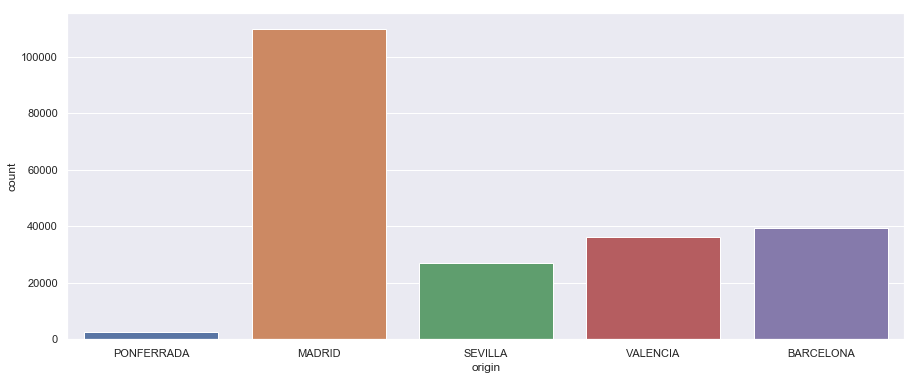

In [15]:
fig=plt.figure(figsize=(15,6))
ax=sns.countplot(x= 'origin', data= df)

Most number of people are boarding from Madrid, while Ponferrada has minimum number of people travelling to other cities

#### **Plot number of people for the destination stations**


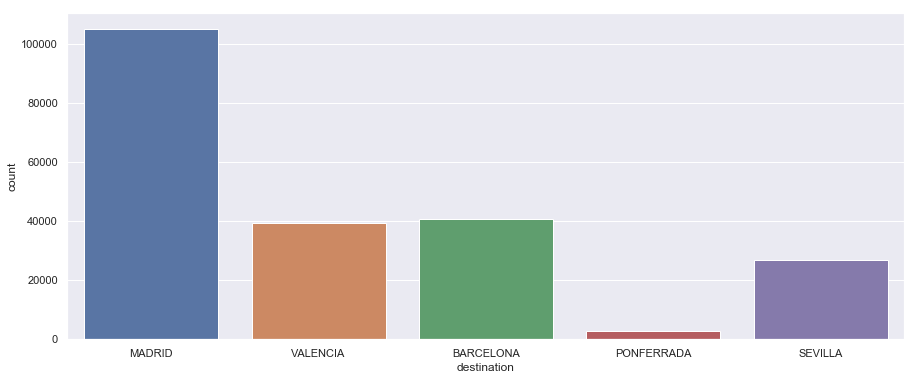

In [16]:
fig= plt.figure(figsize=(15,6))
sns.countplot(x='destination', data= df)

A very large number (approximately geater than 105000) have travelled to Madrid, while only a small number of people have travelled to Ponferrada.

#### **Plot different types of train that runs in Spain**

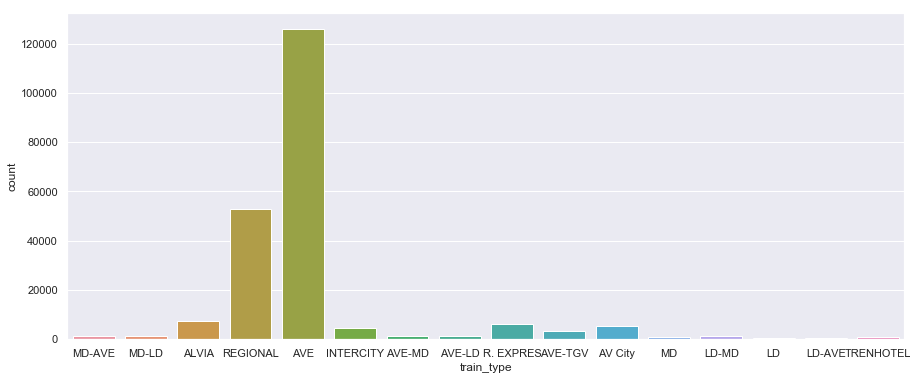

In [17]:
fig= plt.figure(figsize=(15,6))
sns.countplot(x='train_type', data=df)


**AVE** type train runs the maximum in number as compared to other train types

#### **Plot number of trains of different class**

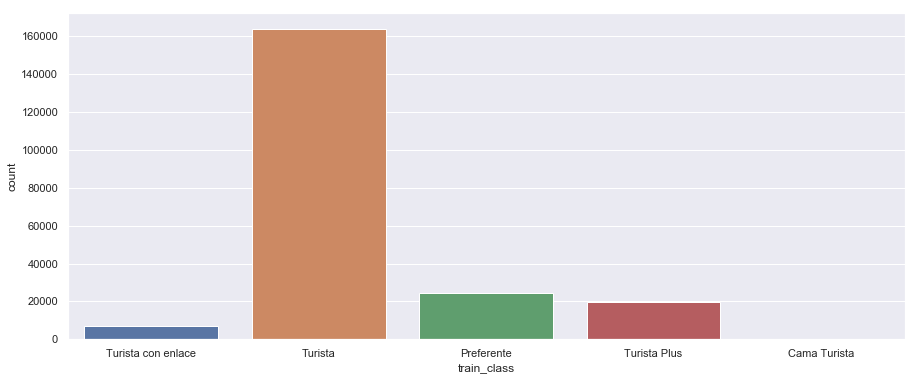

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='train_class', data= df)

**Turista** train class is mostly used for travelling by the people.


#### ** Plot number of tickets bought from each category**


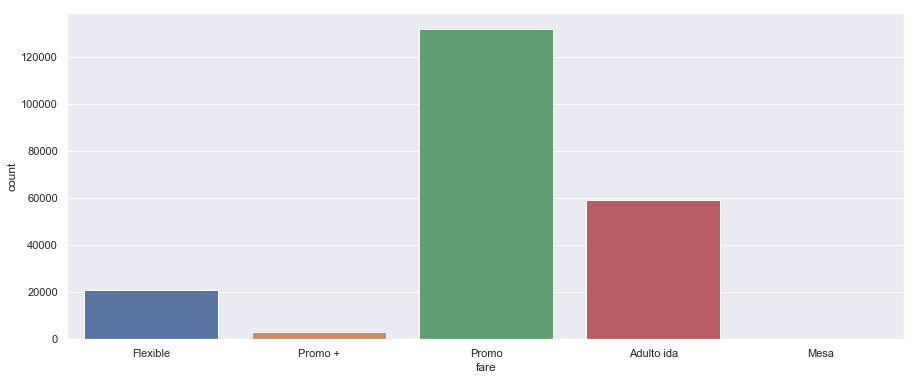

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='fare', data= df)

**Promo** fare tickets are the most bought tickets for travelling around spain.

#### **Plot distribution of the ticket prices**

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


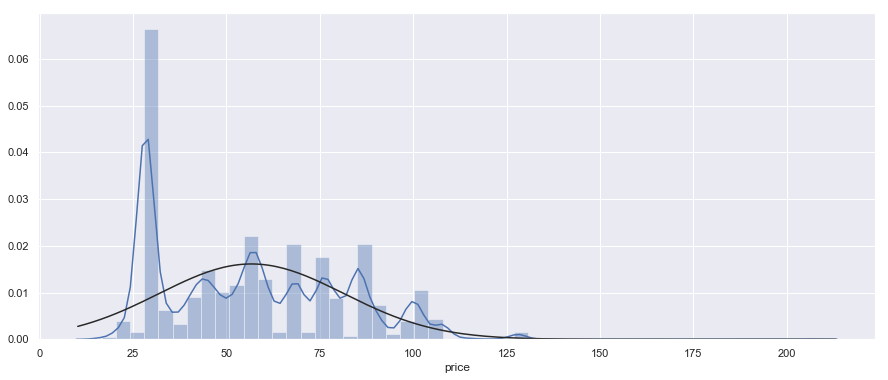

In [20]:
from scipy.stats import norm
plt.subplots(figsize=(15,6))
sns.distplot(df['price'], fit=norm)
plt.show()

The distribution of ticket prices is multimodal and right skewed. The mode value lies in between 27-29 as the bar for this particular bin is highest.

###### **Show train_class vs price through boxplot**

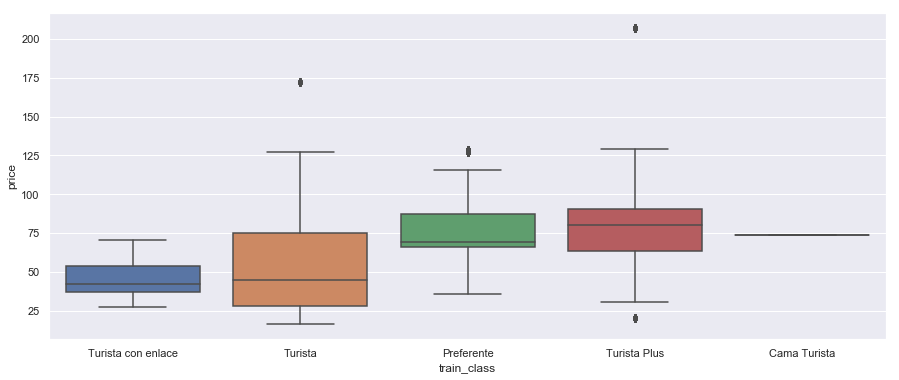

In [21]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='train_class',y='price',data=data)

The ticket price for **Turista Plus** train class is comparatilvely high, but **Cama Turista** is bought by fewer people, as it may refer to a less visited destination e.g. Ponferrada.**Turista** class is the most sought for train class as it offer ticket prices that range from minimum possible upto approximately the the highest possible with exception of few outliers.**Turista con enlace** offers the prices between 25 and 75 euros and is 2nd least used train class.

#### **Show train_type vs price through boxplot**


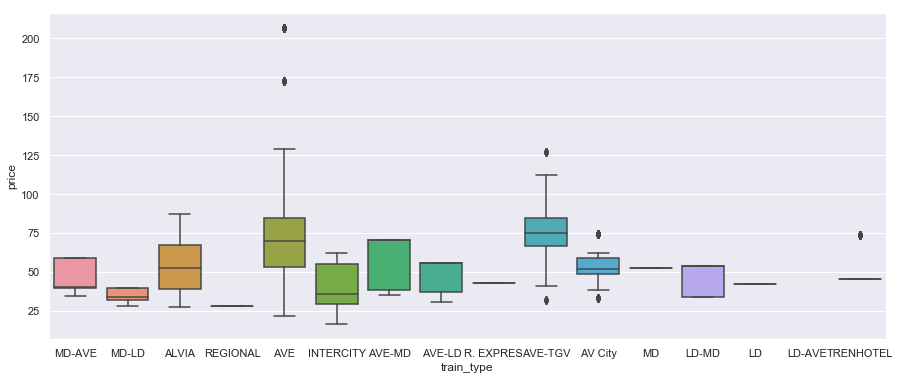

In [22]:
plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='train_type',y='price',data=data)
plt.show()

From the above plot we can infer that **AVE** and **Ave-TGV** cost more as compared to other trains.



## Feature Engineering


In [23]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [26]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Remove redundant features**

In [27]:
df.drop(['start_date','end_date'],axis=1,inplace=True)
df.head()      

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Findout people travelling from MADRID to SEVILLA

In [28]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='SEVILLA')]

#### Make a plot for finding out travelling hours for each train type

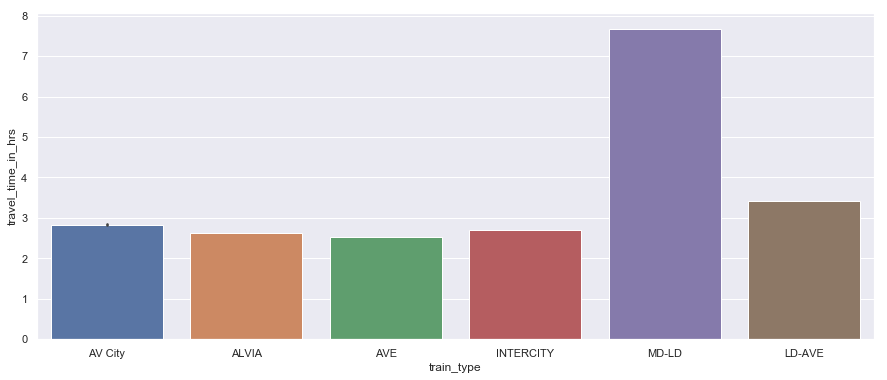

In [29]:
plt.figure(figsize=[15,6])
sns.barplot(x='train_type', y='travel_time_in_hrs', data =df1)

#### **Show train_type vs price through boxplot**


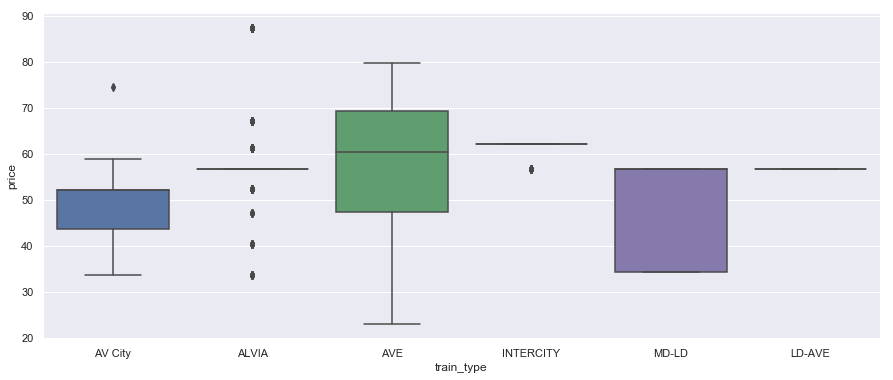

In [30]:
plt.figure(figsize=[15,6])
sns.boxplot(x='train_type', y= 'price', data =df1)

## **Travelling from MADRID to BARCELONA**


#### Findout people travelling from MADRID to BARCELONA

In [31]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='BARCELONA')]

#### Make a plot for finding out travelling hours for each train type

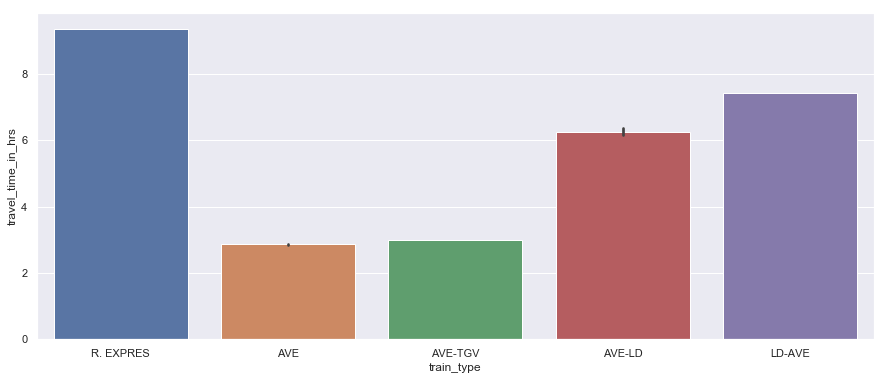

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='train_type', y= 'travel_time_in_hrs', data= df1)

#### **Show train_type vs price through boxplot**

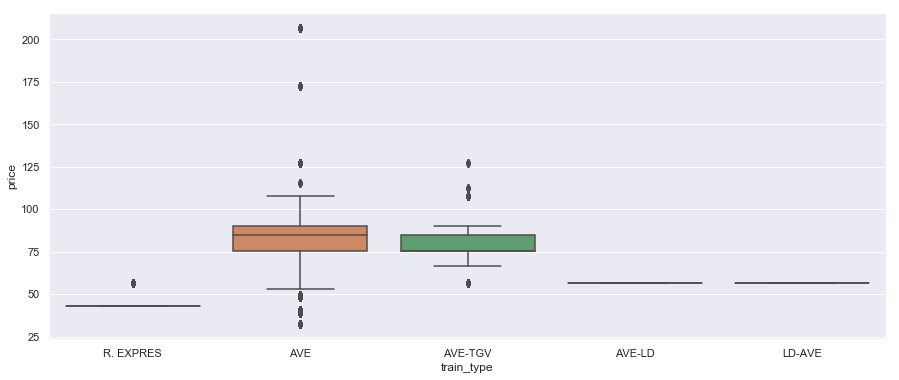

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(x='train_type', y='price', data= df1)

## **Travelling from MADRID to VALENCIA**

#### Findout people travelling from MADRID to VALENCIA

In [34]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='VALENCIA')]

#### Make a plot for finding out travelling hours for each train type

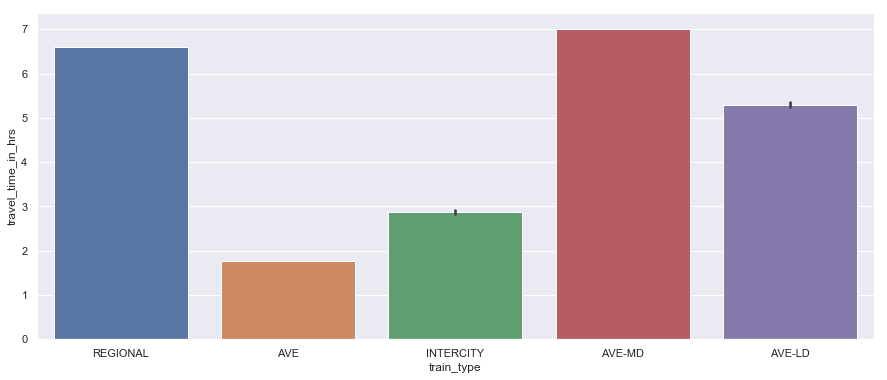

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x='train_type', y= 'travel_time_in_hrs', data= df1)

#### **Show train_type vs price through boxplot**

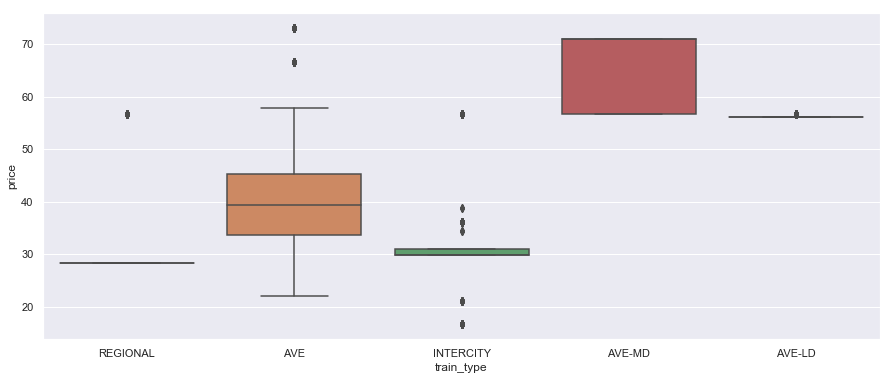

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(x='train_type', y='price', data= df1)

## **Travelling from MADRID to PONFERRADA**

#### Findout people travelling from MADRID to PONFERRADA

In [37]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='PONFERRADA')]

#### Make a plot for finding out travelling hours for each train type

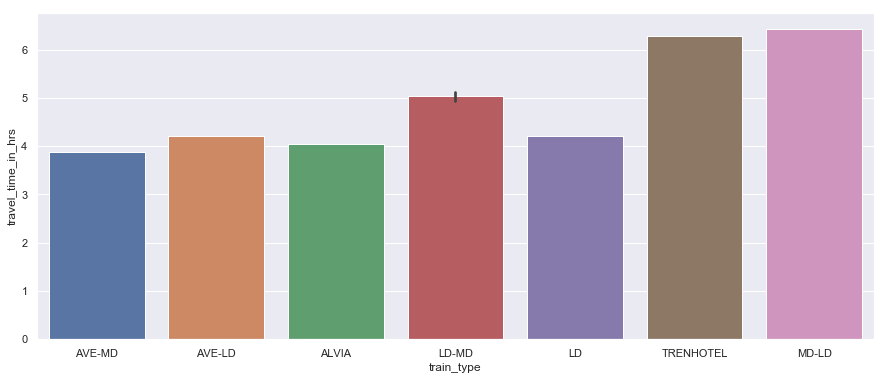

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data= df1)

#### Show train_type vs price through boxplot**

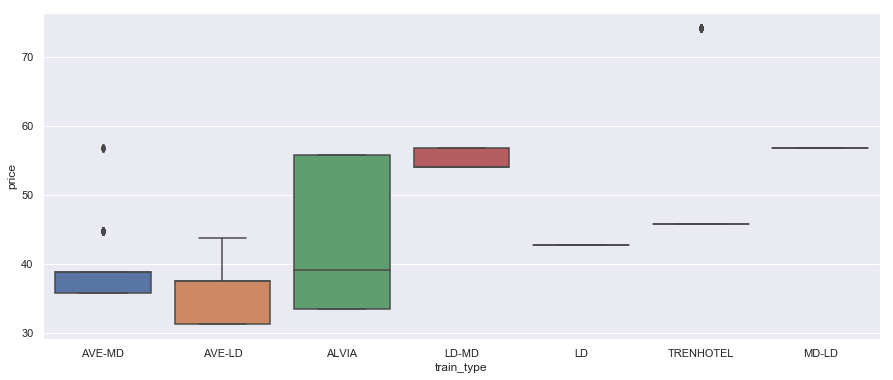

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x='train_type', y='price', data= df1)

# Applying Linear  Regression

#### Import LabelEncoder library from sklearn 

In [40]:
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [41]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [42]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Separate the dependant and independant variables

In [43]:
X = df.drop(['price','index'], axis=1)
Y = df['price']

In [44]:
X.head()

,origin,destination,train_type,train_class,fare,travel_time_in_hrs
0,2,1,11,4,1,4.700000
1,2,1,11,4,4,5.800000
2,2,1,12,4,4,5.916667
3,2,1,11,4,4,4.983333
4,2,1,0,2,3,4.133333


####  Import test_train_split from sklearn

In [45]:
from sklearn.model_selection import train_test_split

#### Split the data into training and test set**

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25, shuffle=True)

####  Import LinearRegression library from sklearn

In [47]:
from sklearn.linear_model import LinearRegression

#### Make an object of LinearRegression( ) and train it using the training data set

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Find out the predictions using test data set.

In [50]:
lr_predict = lr.predict(X_test)

####  Find out the predictions using training data set.

In [51]:
lr_predict_train = lr.predict(X_train)

#### Import r2_score library form sklearn

In [52]:
from sklearn.metrics import r2_score

#### Find out the R2 Score for test data and print it.

In [53]:
lr_r2_test= r2_score(Y_test, lr_predict)

#### Find out the R2 Score for training data and print it.

In [54]:
lr_r2_train = r2_score(Y_train, lr_predict_train )

Comaparing training and testing R2 scores

In [55]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7250571229406206
R2 score for Linear Regression Testing Data is:  0.7304404433036449


In [56]:
def adjR2 (xtest,ytest,r2):
    n = len(ytest)
    k = xtest.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    return adj_r2


print(f'The adjusted R2 for Training Data is: {adjR2(X_train,Y_train,lr_r2_train)}')
print(f'The adjusted R2 for Testing Data is: {adjR2(X_test,Y_test,lr_r2_test)}')

The adjusted R2 for Training Data is: 0.725046174784193
The adjusted R2 for Testing Data is: 0.7304153963437672


**Adjusted R2 score for training and testing data is same as R2 Score, so we do not need to remove any features**

# Applying Polynomial Regression

#### Import PolynomialFeatures from sklearn

In [57]:
from sklearn.preprocessing import PolynomialFeatures 

####  Make an object of default Polynomial Features

In [58]:
poly_reg = PolynomialFeatures()

####  Transform the features to higher degree features.

In [59]:
X_train_poly, X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

#### Fit the transformed features to Linear Regression

In [60]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Find the predictions on the data set

In [61]:
y_train_predicted,y_test_predicted = poly_model.predict(X_train_poly), poly_model.predict(X_test_poly)

#### Evaluate R2 score for training data set

In [62]:
#evaluating the model on training dataset
r2_train = r2_score(Y_train, y_train_predicted)

#### Evaluate R2 score for test data set

In [63]:
# evaluating the model on test dataset
r2_test = r2_score(Y_test, y_test_predicted)

Comaparing training and testing R2 scores

In [64]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8201595021043542
The r2 score for testing set is:  0.8209917572809505


#### Select the best model

In [65]:
from sklearn.metrics import mean_squared_error
mse_train=[]
mse_test=[]
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    mse_train.append(mean_squared_error(Y_train, y_tr_predicted))
    mse_test.append(mean_squared_error(Y_test, y_tst_predict))
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7250571229406206, 0.8201595021043542, 0.8452756113130544, 0.8628809561641191, 0.8689307311492412]
R2 Test [0.7304404433036453, 0.8209917572809505, 0.8446382863781015, -6015.97009117539, -51778.4637657292]


In [66]:
print ('R2 Train', mse_train)
print ('R2 Test', mse_test)

R2 Train [168.64540813627954, 110.31118351355838, 94.90537801097811, 84.1065509980982, 80.39571919765035]
R2 Test [164.69882215086622, 109.37266366087076, 94.92481570479195, 3676322.587404589, 31636855.314409934]


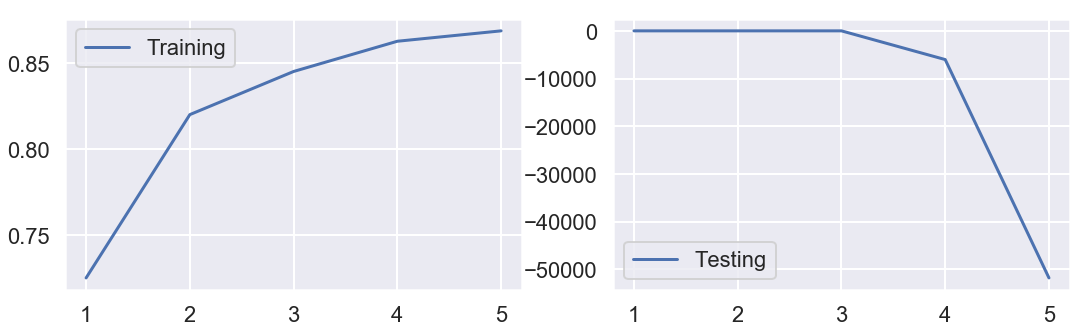

In [67]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing')

Ploynomial degree 3 model gives the best result as the r2_score for both test and train is higher as compared to other degrees. After degree 3 r2_score for testing starts decreasing, and r2_score for training keeps on increasing. Plus Mean Square Error shows that at degree 3 the training and testing data have minimum error, but starts rising for testing data after this point.

(0, 1)

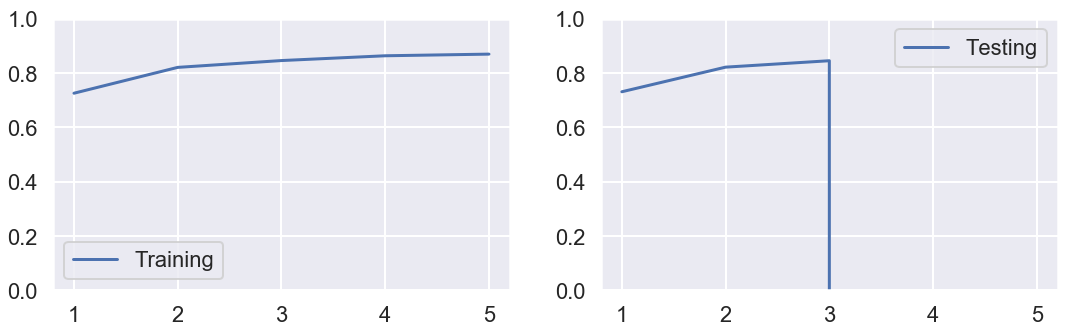

In [68]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.ylim(0,1)
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing')
plt.ylim(0,1)

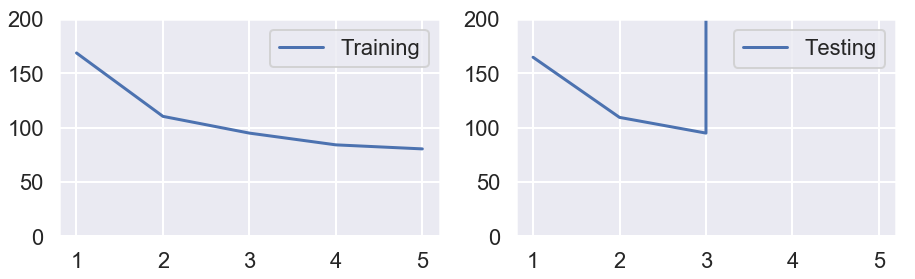

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=mse_train, label='Training')
plt.ylim(0,200)

plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=mse_test, label='Testing')
plt.ylim(0,200)
plt.show();


### Revising the model with degree 3

In [70]:
poly_reg = PolynomialFeatures(degree=3)

In [71]:
X_train_poly, X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

In [72]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
y_train_predicted,y_test_predicted = poly_model.predict(X_train_poly), poly_model.predict(X_test_poly)

In [74]:
#evaluating the model on training dataset
r2_train = r2_score(Y_train, y_train_predicted)

In [75]:
# evaluating the model on test dataset
r2_test = r2_score(Y_test, y_test_predicted)

Comaparing training and testing R2 scores

In [76]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8452756113130544
The r2 score for testing set is:  0.8446382863781015
